In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading the Dataset**

In [ ]:
df = pd.read_csv('Darknet.csv')
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158.0,216.58.220.99,443.0,6.0,24/07/2015 04:09:48 PM,229.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159.0,216.58.220.99,443.0,6.0,24/07/2015 04:09:48 PM,407.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160.0,216.58.220.99,443.0,6.0,24/07/2015 04:09:48 PM,431.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134.0,74.125.136.120,443.0,6.0,24/07/2015 04:09:48 PM,359.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697.0,173.194.65.127,19305.0,6.0,24/07/2015 04:09:45 PM,10778451.0,591.0,400.0,...,0.0,0.0,0.0,0.0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13041,10.152.152.11-10.152.152.10-58034-53-17,10.152.152.11,58034.0,10.152.152.10,53.0,17.0,23/02/2016 02:06:53 PM,357986.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Browsing
13042,10.152.152.11-10.152.152.10-49162-53-17,10.152.152.11,49162.0,10.152.152.10,53.0,17.0,23/02/2016 02:24:02 PM,867005.0,2.0,2.0,...,0.0,0.0,0.0,0.0,1.456252e+15,5.274854e+05,1.456252e+15,1.456252e+15,Non-Tor,Browsing
13043,10.152.152.11-10.152.152.10-52036-53-17,10.152.152.11,52036.0,10.152.152.10,53.0,17.0,23/02/2016 02:01:51 PM,188895.0,2.0,2.0,...,0.0,0.0,0.0,0.0,1.456251e+15,1.335081e+05,1.456251e+15,1.456251e+15,Non-Tor,Browsing
13044,173.194.116.205-10.152.152.11-80-43405-6,173.194.116.205,80.0,10.152.152.11,43405.0,6.0,23/02/2016 02:30:31 PM,20.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Browsing


In [ ]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,13045.000000,13045.000000,13045.000000,1.304500e+04,13045.00000,13045.000000,13045.000000,1.304500e+04,13045.000000,13045.000000,...,13045.000000,13045.000000,13045.0,13045.0,13045.0,13045.0,1.304500e+04,1.304500e+04,1.304500e+04,1.304500e+04
mean,37942.238482,12230.971023,8.850517,2.232722e+07,46.77087,55.549329,2783.729475,3.725621e+04,227.911844,10.201456,...,20.872288,16.843542,0.0,0.0,0.0,0.0,8.293181e+14,8.779831e+13,8.781195e+14,6.417236e+14
std,20133.572452,20704.255198,4.838582,3.930520e+07,285.45184,305.309172,20835.548035,2.111727e+05,394.829399,19.742909,...,204.930992,5.310229,0.0,0.0,0.0,0.0,6.898236e+14,2.515619e+14,7.106340e+14,7.215106e+14
min,0.000000,0.000000,0.000000,0.000000e+00,1.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,34702.000000,80.000000,6.000000,2.950000e+02,1.00000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,8.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,44007.000000,80.000000,6.000000,5.182490e+05,2.00000,2.000000,64.000000,5.400000e+01,38.000000,0.000000,...,1.000000,20.000000,0.0,0.0,0.0,0.0,1.398066e+15,2.392665e+05,1.456250e+15,9.771013e+06
75%,52746.000000,19305.000000,17.000000,1.571382e+07,10.00000,8.000000,417.000000,5.680000e+02,310.000000,20.000000,...,2.000000,20.000000,0.0,0.0,0.0,0.0,1.456251e+15,3.026548e+07,1.456252e+15,1.456251e+15
max,64814.000000,65358.000000,17.000000,1.200000e+08,4714.00000,3964.000000,553949.000000,4.735414e+06,1460.000000,531.000000,...,4550.000000,20.000000,0.0,0.0,0.0,0.0,1.456338e+15,1.029781e+15,1.456338e+15,1.456338e+15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13046 entries, 0 to 13045
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     13046 non-null  object 
 1   Src IP                      13046 non-null  object 
 2   Src Port                    13045 non-null  float64
 3   Dst IP                      13045 non-null  object 
 4   Dst Port                    13045 non-null  float64
 5   Protocol                    13045 non-null  float64
 6   Timestamp                   13045 non-null  object 
 7   Flow Duration               13045 non-null  float64
 8   Total Fwd Packet            13045 non-null  float64
 9   Total Bwd packets           13045 non-null  float64
 10  Total Length of Fwd Packet  13045 non-null  float64
 11  Total Length of Bwd Packet  13045 non-null  float64
 12  Fwd Packet Length Max       13045 non-null  float64
 13  Fwd Packet Length Min       130

In [ ]:
df.isnull().sum()

,0
Flow ID,0
Src IP,0
Src Port,1
Dst IP,1
Dst Port,1
...,...
Idle Std,1
Idle Max,1
Idle Min,1
Label,1


In [ ]:
df.shape

(13046, 85)

# **Data Cleaning**

Removing the Unwanted columns Values

In [ ]:
df_cleaned = df.drop(columns=['Flow ID','Src IP','Timestamp'])
df_cleaned

,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,57158.0,216.58.220.99,443.0,6.0,229.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,57159.0,216.58.220.99,443.0,6.0,407.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,57160.0,216.58.220.99,443.0,6.0,431.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,49134.0,74.125.136.120,443.0,6.0,359.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,34697.0,173.194.65.127,19305.0,6.0,10778451.0,591.0,400.0,64530.0,6659.0,131.0,...,0.0,0.0,0.0,0.0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13041,58034.0,10.152.152.10,53.0,17.0,357986.0,1.0,1.0,34.0,50.0,34.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Browsing
13042,49162.0,10.152.152.10,53.0,17.0,867005.0,2.0,2.0,86.0,102.0,43.0,...,0.0,0.0,0.0,0.0,1.456252e+15,5.274854e+05,1.456252e+15,1.456252e+15,Non-Tor,Browsing
13043,52036.0,10.152.152.10,53.0,17.0,188895.0,2.0,2.0,90.0,106.0,45.0,...,0.0,0.0,0.0,0.0,1.456251e+15,1.335081e+05,1.456251e+15,1.456251e+15,Non-Tor,Browsing
13044,80.0,10.152.152.11,43405.0,6.0,20.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Browsing


In [ ]:
df_cleaned = df.dropna()
df_cleaned
df_cleaned = df.drop(columns=['Flow ID','Src IP','Timestamp'])

# **Data Preprocessing**

In [ ]:
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan)
df_cleaned = df_cleaned.dropna()

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
le = LabelEncoder()
df_cleaned['Dst IP'] = le.fit_transform(df_cleaned['Dst IP'])
df_cleaned['Label'] = le.fit_transform(df_cleaned['Label'])
df_cleaned['Label.1'] = le.fit_transform(df_cleaned['Label.1'])
scaler = MinMaxScaler()
df_cleaned['Dst IP'] = scaler.fit_transform(df_cleaned[['Dst IP']])

# **Cross Validation**

In [ ]:
x = df_cleaned.drop(columns=['Label'])
y = df_cleaned['Label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# **RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
Rpredict = rf.predict(x_test)
Rpredict

array([0., 0., 0., ..., 0., 0., 0.])

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
kpredict = knn.predict(x_test)
kpredict

array([0., 0., 0., ..., 0., 0., 0.])

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

ValueError: The number of classes has to be greater than one; got 1 class

In [ ]:
spredict = svc.predict(x_test)
spredict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
dpredict = dt.predict(x_test)
dpredict

array([0., 0., 0., ..., 0., 0., 0.])

# **Performance Metrics**

Random Forest

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,predict)
rmse = np.sqrt(mse)
rmse

0.012226777193417021

In [ ]:
mae = mean_absolute_error(y_test,predict)
mae

0.000562451353897833

KNN

In [ ]:
kmse = mean_squared_error(y_test,kpredict)
krmse = np.sqrt(kmse)
krmse

0.06041894589809236

SVM

In [ ]:
smse = mean_squared_error(y_test,spredict)
srmse = np.sqrt(smse)
srmse

0.31093042188584047

In [ ]:
dmse = mean_squared_error(y_test,dpredict)
drmse = np.sqrt(dmse)
drmse

0.014311732716026104

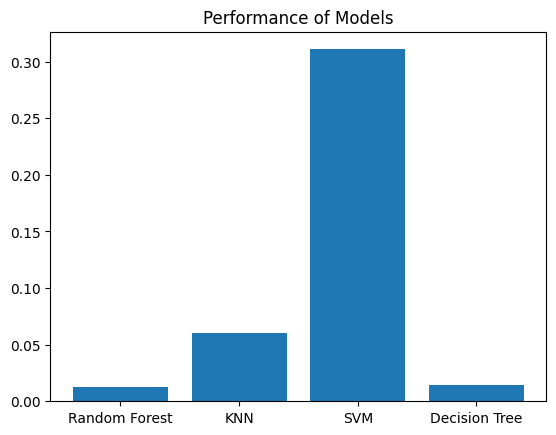

In [ ]:
x_values = ['Random Forest','KNN','SVM','Decision Tree']
y_values = [rmse,krmse,srmse,drmse]
plt.title('Performance of Models')
plt.bar(x_values,y_values)
plt.show()
